Linear Regression-Walmart Data

1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import normaltest
import pickle

2.Problem Statement

To estimate Unemployment Rate

3.Data Gathering

In [13]:
df=pd.read_csv("Walmart.csv")
df.drop("Date",axis=1,inplace=True)
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,718125.53,0,56.47,3.969,192.330854,8.667


4.Exploratory data analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 352.0 KB


In [15]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [16]:
df.var()

Store           1.686929e+02
Weekly_Sales    3.185097e+11
Holiday_Flag    6.504996e-02
Temperature     3.402155e+02
Fuel_Price      2.106991e-01
CPI             1.548951e+03
Unemployment    3.518944e+00
dtype: float64

5.Assumptions(Linearity)

In [17]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


<Axes: >

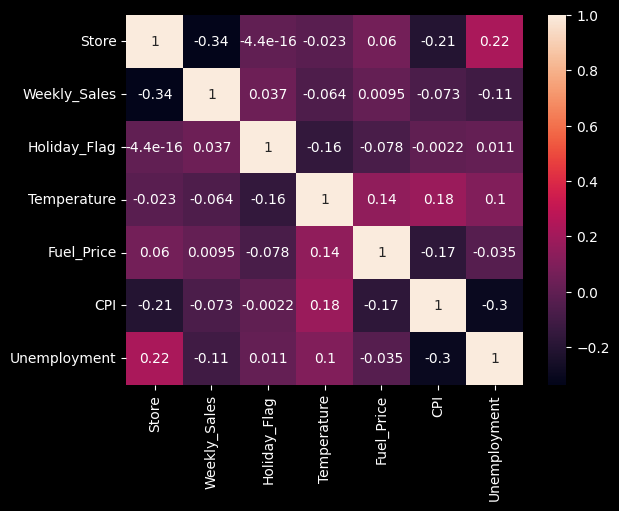

In [18]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

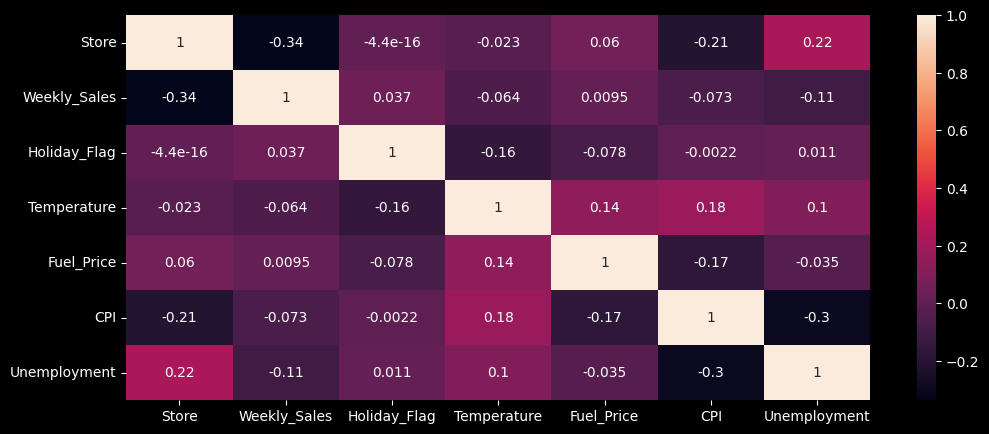

In [19]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

In [20]:
Correlation=df.corr().tail(1)
Correlation

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Unemployment,0.223531,-0.106176,0.01096,0.101158,-0.034684,-0.30202,1.0


<Axes: >

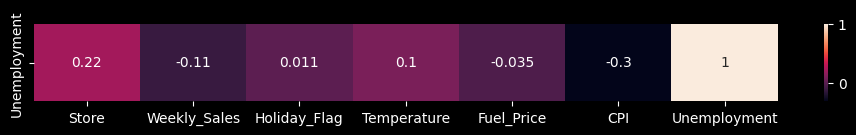

In [21]:
plt.figure(figsize=(12,1))
sns.heatmap(Correlation,annot=True)

6.Assumptions(No Multi Co Linearity)

In [22]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [23]:
df.to_numpy()

array([[1.00000000e+00, 1.64369090e+06, 0.00000000e+00, ...,
        2.57200000e+00, 2.11096358e+02, 8.10600000e+00],
       [1.00000000e+00, 1.64195744e+06, 1.00000000e+00, ...,
        2.54800000e+00, 2.11242170e+02, 8.10600000e+00],
       [1.00000000e+00, 1.61196817e+06, 0.00000000e+00, ...,
        2.51400000e+00, 2.11289143e+02, 8.10600000e+00],
       ...,
       [4.50000000e+01, 7.34464360e+05, 0.00000000e+00, ...,
        4.00000000e+00, 1.92327265e+02, 8.66700000e+00],
       [4.50000000e+01, 7.18125530e+05, 0.00000000e+00, ...,
        3.96900000e+00, 1.92330854e+02, 8.66700000e+00],
       [4.50000000e+01, 7.60281430e+05, 0.00000000e+00, ...,
        3.88200000e+00, 1.92308899e+02, 8.66700000e+00]])

In [25]:
df.shape[1]

7

In [26]:
vif_list=[]
for i in range(df.shape[1]-1):
    vif=variance_inflation_factor(df.to_numpy(),i)
    print(f"Vif of {df.columns[i]} is:",vif)
    vif_list.append(vif)
    

Vif of Store is: 4.83561486472645
Vif of Weekly_Sales is: 4.666176577961482
Vif of Holiday_Flag is: 1.1034942230093456
Vif of Temperature is: 13.373877351989647
Vif of Fuel_Price is: 30.144859177656866
Vif of CPI is: 14.85151765093668


In [27]:
vif_list

[4.83561486472645,
 4.666176577961482,
 1.1034942230093456,
 13.373877351989647,
 30.144859177656866,
 14.85151765093668]

In [28]:
x=df.drop('Unemployment',axis=1)
x.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI'],
      dtype='object')

In [29]:
s1=pd.Series(vif_list,index=x.columns)
s1

Store            4.835615
Weekly_Sales     4.666177
Holiday_Flag     1.103494
Temperature     13.373877
Fuel_Price      30.144859
CPI             14.851518
dtype: float64

<Axes: >

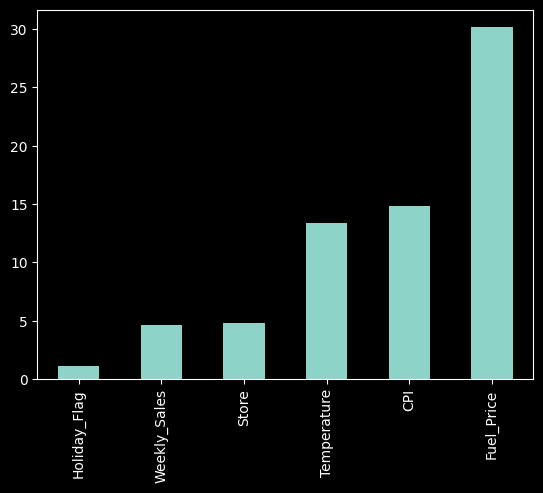

In [30]:
s1.sort_values().plot(kind="bar")

<Axes: >

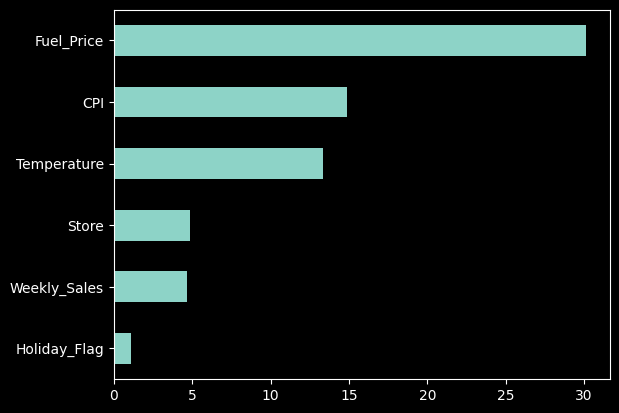

In [31]:
s1.sort_values().plot(kind="barh")

7.Model Training

In [32]:
x=df.drop('Unemployment',axis=1)
y=df["Unemployment"]

In [33]:
x

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI
0,1,1643690.90,0,42.31,2.572,211.096358
1,1,1641957.44,1,38.51,2.548,211.242170
2,1,1611968.17,0,39.93,2.514,211.289143
3,1,1409727.59,0,46.63,2.561,211.319643
4,1,1554806.68,0,46.50,2.625,211.350143
...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558
6431,45,733455.07,0,64.89,3.985,192.170412
6432,45,734464.36,0,54.47,4.000,192.327265
6433,45,718125.53,0,56.47,3.969,192.330854


In [34]:
y

0       8.106
1       8.106
2       8.106
3       8.106
4       8.106
        ...  
6430    8.684
6431    8.667
6432    8.667
6433    8.667
6434    8.667
Name: Unemployment, Length: 6435, dtype: float64

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [36]:
x_train

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI
99,1,1497462.72,1,44.55,3.129,219.535990
5641,40,847246.50,0,52.68,3.988,134.435733
1970,14,1893447.71,0,59.45,3.900,190.536321
179,2,1794355.49,0,65.80,2.720,211.471329
3300,24,1264117.01,0,51.07,3.021,132.022667
...,...,...,...,...,...,...
1099,8,1462254.05,0,38.16,3.112,222.874386
2514,18,951549.61,1,68.11,3.809,136.274581
3606,26,1042226.30,1,54.82,2.717,132.756452
5704,40,979848.71,0,67.48,3.561,138.263000


In [37]:
x_test

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI
4461,32,1189887.86,0,71.46,2.732,190.294824
4295,31,1366193.35,0,57.10,2.667,211.037551
6212,44,280357.30,0,47.55,3.655,128.955300
4052,29,455952.18,0,32.56,3.193,132.882323
4311,31,1311704.92,0,82.29,2.669,210.880373
...,...,...,...,...,...,...
3186,23,1387953.75,0,35.59,2.961,132.978323
3651,26,1017867.80,0,69.52,3.882,135.873839
5534,39,1478537.93,0,55.83,3.157,218.406288
3373,24,1227535.97,0,65.56,3.937,136.314500


In [38]:
y_train

99      7.866
5641    4.781
1970    8.424
179     8.163
3300    8.211
        ...  
1099    6.123
2514    8.890
3606    8.445
5704    4.156
2575    8.350
Name: Unemployment, Length: 5148, dtype: float64

In [39]:
y_test

4461     9.017
4295     8.324
6212     6.906
4052    10.256
4311     8.099
         ...  
3186     5.287
3651     7.767
5534     7.244
3373     8.358
2951     7.441
Name: Unemployment, Length: 1287, dtype: float64

8.Instantiating Linear Model

In [41]:
linear_reg=LinearRegression()
linear_reg

LinearRegression()

In [42]:
linear_reg.fit(x_train, y_train)

LinearRegression()

In [43]:
linear_reg.coef_

array([ 2.05582306e-02, -2.36825231e-07,  2.25779260e-01,  1.92502200e-02,
       -4.98623879e-01, -1.52920902e-02])

In [44]:
linear_reg.intercept_

10.877566568458393

9.Model Evaluation on Training data

In [45]:
y_predict_training=linear_reg.predict(x_train)
y_predict_training[:10]

array([6.70950613, 8.46903264, 7.00305944, 7.17030327, 8.52945277,
       8.40283001, 8.06309419, 9.4481936 , 8.78627568, 8.61863466])

In [46]:
y_train[:10]

99       7.866
5641     4.781
1970     8.424
179      8.163
3300     8.211
2439     9.269
5759     7.508
5874     9.524
3307     8.211
5398    12.187
Name: Unemployment, dtype: float64

In [47]:
mse=mean_squared_error(y_train,y_predict_training)
print("Mean squared error:",mse)
print()
rsme=np.sqrt(mse)
print("Root mean squared error:",rsme)
print()
mae=mean_absolute_error(y_train,y_predict_training)
print("Mean absolute error:",mae)
print()
r_squared=r2_score(y_train,y_predict_training)
print("R squared value:",r_squared)


Mean squared error: 2.958810668775094

Root mean squared error: 1.7201193763152296

Mean absolute error: 1.1747735900999123

R squared value: 0.15850116681406612


10.Model Evaluation on testing data

In [48]:
y_predict_test=linear_reg.predict(x_test)
y_predict_test[:10]

array([8.35700915, 7.73347507, 8.83661463, 8.36840693, 8.23269868,
       6.73071409, 8.52364835, 6.61501466, 8.37206081, 7.59839398])

In [49]:
y_test[:10]

4461     9.017
4295     8.324
6212     6.906
4052    10.256
4311     8.099
1956     8.523
3040     8.572
1111     5.825
6130     9.575
2733     7.856
Name: Unemployment, dtype: float64

In [50]:
mse=mean_squared_error(y_test,y_predict_test)
print("Mean squared error:",mse)
print()
rmse=np.sqrt(mse)
print("Root mean squared error:",rmse)
print()
mae=mean_absolute_error(y_test,y_predict_test)
print("Mean absolute error:",mae)
print()
r_squared=r2_score(y_test,y_predict_test)
print("R sqaured value:",r_squared)

Mean squared error: 2.9120111781207125

Root mean squared error: 1.7064615958528666

Mean absolute error: 1.1567659231830465

R sqaured value: 0.17445077022177957


11.Testing our model

In [51]:
row_23=x_train.iloc[23]
row_23

Store               34.000
Weekly_Sales    966232.690
Holiday_Flag         0.000
Temperature         63.050
Fuel_Price           3.872
CPI                129.089
Name: 4785, dtype: float64

In [52]:
y_predict=linear_reg.predict([row_23])
y_predict

array([8.65673221])

In [53]:
y_train.iloc[23]

10.581

12.Assumptions(Normality of residual)

In [54]:
residual=y_train-y_predict_training
residual

99      1.156494
5641   -3.688033
1970    1.420941
179     0.992697
3300   -0.318453
          ...   
1099   -0.347389
2514    0.314006
3606   -0.616447
5704   -4.720918
2575    0.251140
Name: Unemployment, Length: 5148, dtype: float64

kdeplot

<Axes: xlabel='Unemployment', ylabel='Density'>

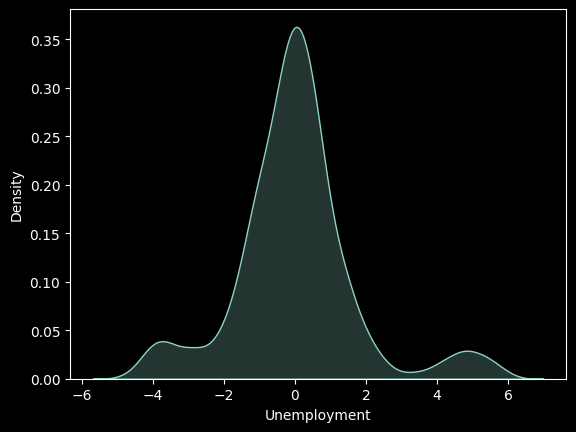

In [55]:
sns.kdeplot(residual,fill=True)

histplot

<Axes: xlabel='Unemployment', ylabel='Count'>

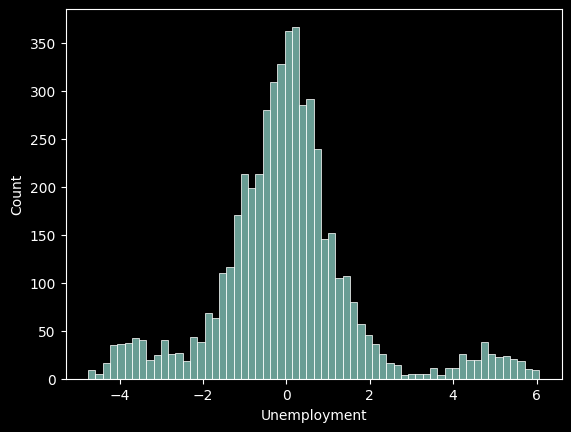

In [56]:
sns.histplot(residual)

<Axes: xlabel='Unemployment', ylabel='Count'>

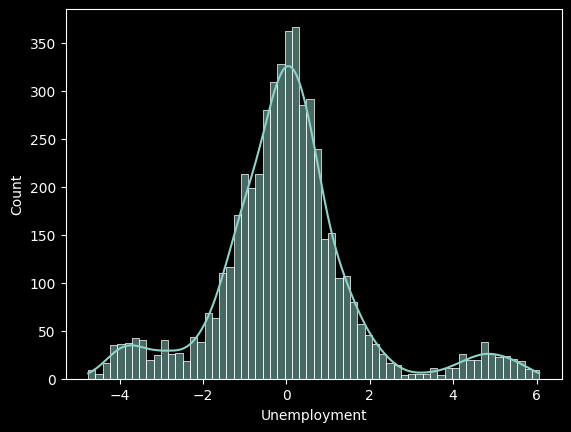

In [57]:
sns.histplot(residual,kde=True)

qq.plot

In [58]:
import statsmodels.api as sm

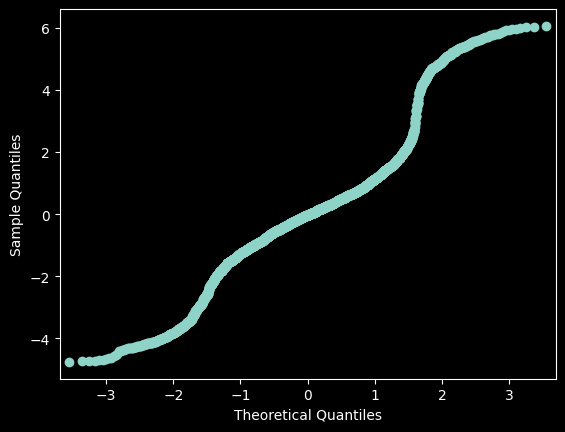

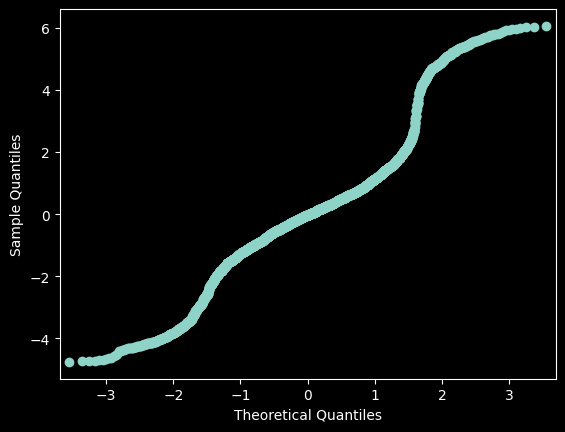

In [59]:
sm.qqplot(residual)

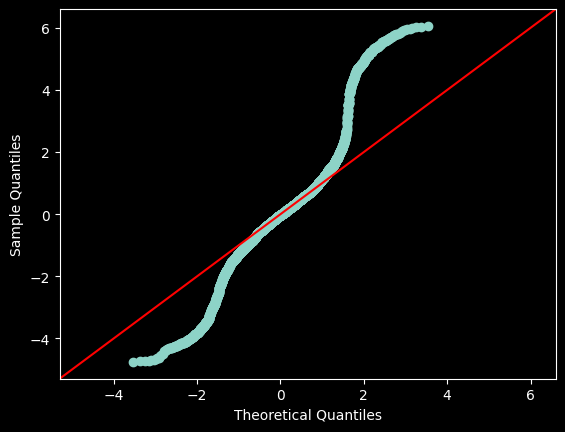

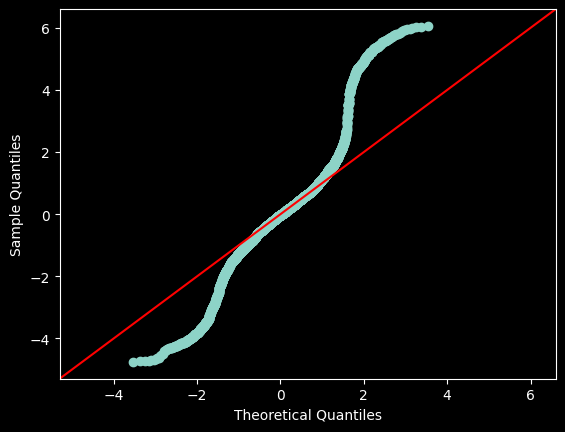

In [60]:
sm.qqplot(residual,line="45")

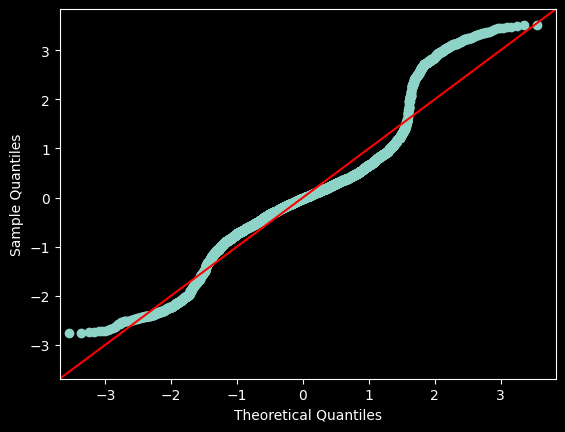

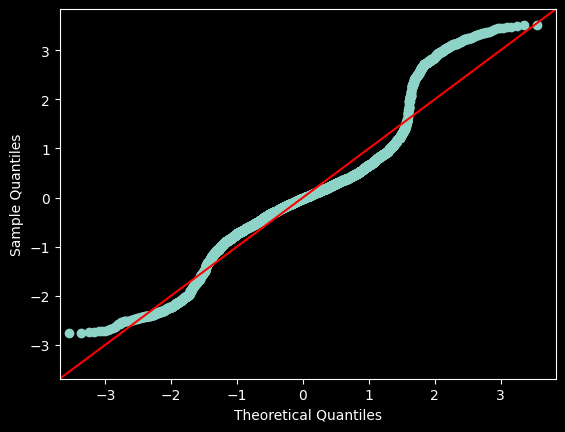

In [61]:
sm.qqplot(residual,line="45",fit=True)

Skewness of Residual

In [62]:
residual.skew()

0.5959052198163203

In [63]:
mean=residual.mean()
print("Mean of Residual:", mean)
median=residual.median()
print("Median of Residual:", median)
mode=residual.mode()[0]
print("Mode of Residual:", mode)

Mean of Residual: 1.429918947644646e-15
Median of Residual: -0.02726616830629114
Mode of Residual: -4.756801322347971
